In [1]:
# Importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Reading data frames

ex_emp = pd.read_excel('employees_left.xlsx')
cur_emp = pd.read_excel('existing_employees.xlsx')
ex_emp.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,2,0.80,0.86,5,262,6,0,0,sales,medium
2,3,0.11,0.88,7,272,4,0,0,sales,medium
3,4,0.72,0.87,5,223,5,0,0,sales,low
4,5,0.37,0.52,2,159,3,0,0,sales,low


In [4]:
# Adding new column 'Status' to dateframe to distinguish current and ex employees


ex_emp['status'] = 0
cur_emp['status'] = 1

In [5]:
cur_emp.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,2001,0.58,0.74,4,215,3,0,0,sales,low,1
1,2002,0.82,0.67,2,202,3,0,0,sales,low,1
2,2003,0.45,0.69,5,193,3,0,0,sales,low,1
3,2004,0.78,0.82,5,247,3,0,0,sales,low,1
4,2005,0.49,0.60,3,214,2,0,0,sales,low,1


In [6]:
ex_emp.head()

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status
0,1,0.38,0.53,2,157,3,0,0,sales,low,0
1,2,0.80,0.86,5,262,6,0,0,sales,medium,0
2,3,0.11,0.88,7,272,4,0,0,sales,medium,0
3,4,0.72,0.87,5,223,5,0,0,sales,low,0
4,5,0.37,0.52,2,159,3,0,0,sales,low,0


In [7]:
# Combining dataframes

full_emp = pd.concat([ex_emp, cur_emp])

In [8]:
# checking for null values

full_emp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14999 entries, 0 to 11427
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Emp ID                 14999 non-null  int64  
 1   satisfaction_level     14999 non-null  float64
 2   last_evaluation        14999 non-null  float64
 3   number_project         14999 non-null  int64  
 4   average_montly_hours   14999 non-null  int64  
 5   time_spend_company     14999 non-null  int64  
 6   Work_accident          14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   dept                   14999 non-null  object 
 9   salary                 14999 non-null  object 
 10  status                 14999 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 1.4+ MB


In [9]:
full_emp.isnull().sum()

Emp ID                   0
satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
promotion_last_5years    0
dept                     0
salary                   0
status                   0
dtype: int64

In [10]:
# Dealing with category data

full_emp['sal_class'] = 0
full_emp['dept_class'] = 0

In [11]:
# salary class conversion


full_emp.loc[full_emp['salary']=='low','sal_class'] = 0
full_emp.loc[full_emp['salary']=='medium','sal_class'] = 1
full_emp.loc[full_emp['salary']=='high','sal_class'] = 2

In [12]:
# dept class conversion - using dict_mapping

# step 1 - make list of dept with unique values
# step2 - make list of keys using length of dept_list
# step 3 - creating dict by combining above two lists
# step 4 - converting category using map function

#step 1

dept_list = full_emp.dept.unique()

#step 2

dept_key_list = range(len(dept_list))

#step 3

dept_dict = dict(zip(dept_list,dept_key_list))

#step 4

full_emp['dept_class'] = full_emp['dept'].map(dept_dict)



In [14]:
full_emp.tail(1)

,Emp ID,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,dept,salary,status,sal_class,dept_class
11427,14211,0.5,0.73,4,180,3,0,0,IT,low,1,0,6


In [23]:
# Categorising features for plotting graphs

# Num_features for numerical features 
# Cat_features for categorical features

num_features = ['satisfaction_level','last_evaluation','number_project','average_montly_hours','time_spend_company','Work_accident','promotion_last_5years']
cat_features = ['dept','salary']

In [16]:
# Creating result dataframe with results

emp_results = full_emp.status

In [18]:
# Creating Histogram function to plot feature Vs status


def hg (function):
    plt.hist(full_emp[function][full_emp.status==1], bins=10, label='in_job')
    plt.hist(full_emp[function][full_emp.status==0], bins=10, label='left_job')
    plt.legend(loc='best')
    plt.xlabel(f'{function}')
    plt.ylabel('No of employees')
    plt.title(f'{function} vs number_of_employees')
    plt.show()

In [21]:
# creating stacked barchart function for categorical data


def  barchart(column):
    employee = full_emp[full_emp['status']==1][column].value_counts()
    ex_employee = full_emp[full_emp['status']==0][column].value_counts()
    df = pd.DataFrame([employee,ex_employee])
    df.index = ['in_job','left_job']
    df.plot(kind = 'bar', stacked = True, figsize = (8,4))

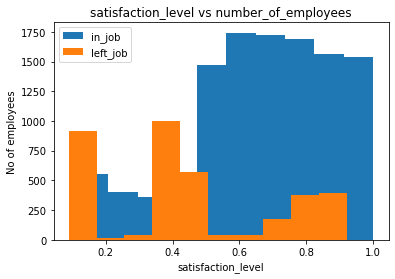

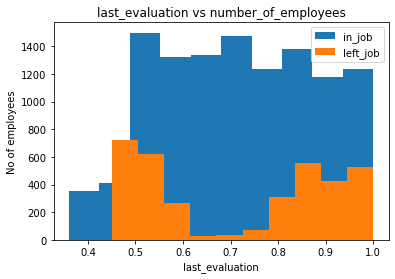

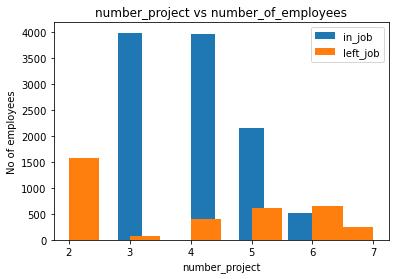

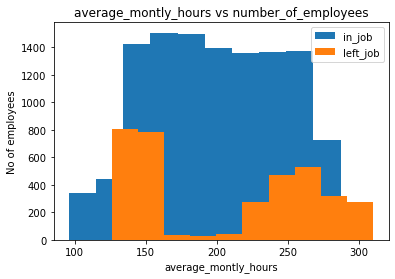

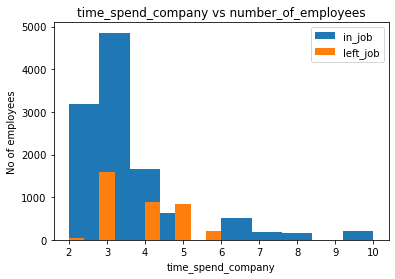

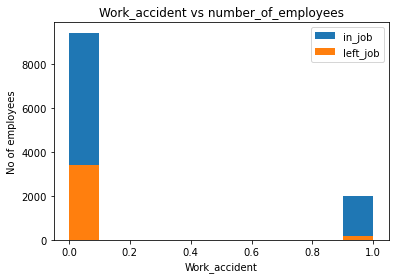

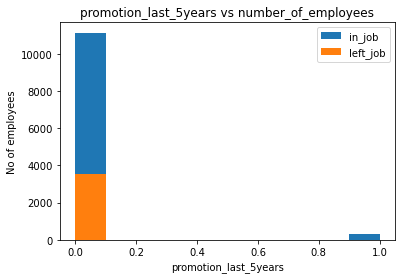

In [24]:
# plotting histogram for numerical features

for f in num_features:
    hg(f)

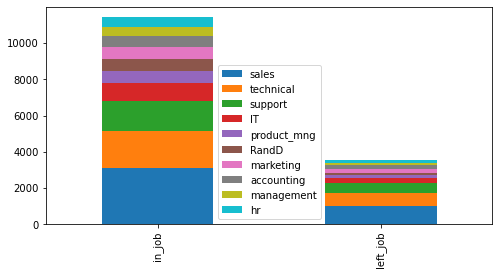

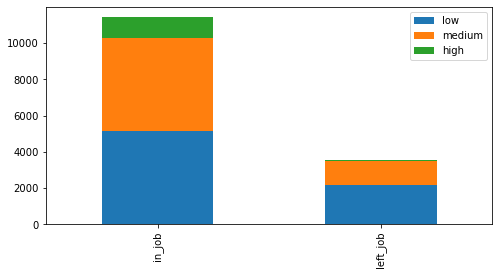

In [25]:
# plotting barchart for categorical features

for f in cat_features:
    barchart(f)

In [96]:
features = ["satisfaction_level","last_evaluation","number_project","average_montly_hours","time_spend_company","Work_accident","promotion_last_5years","sal_class","dept_class"]
emp_features = full_emp[features]
emp_features.head(1)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sal_class,dept_class
0,0.38,0.53,2,157,3,0,0,0,0


In [106]:
# creating a dataframe with just results - status in this case

emp_result = full_emp.status
emp_result

0        0
1        0
2        0
3        0
4        0
        ..
11423    1
11424    1
11425    1
11426    1
11427    1
Name: status, Length: 14999, dtype: int64

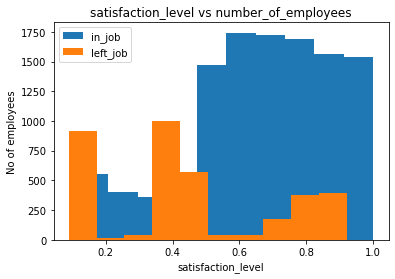

In [129]:
# Satisfaction level VS Status

hg('satisfaction_level')

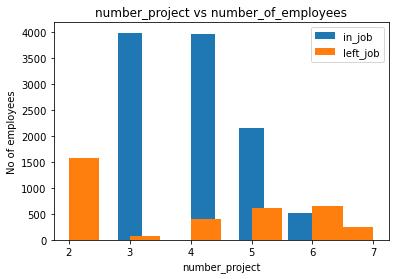

In [130]:
# no_of_projects level VS Status

hg('number_project')

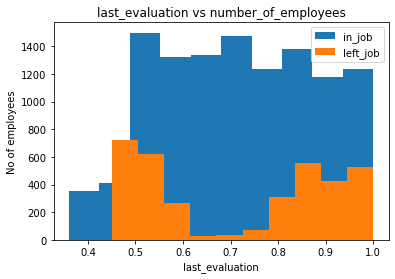

In [131]:
hg('last_evaluation')

In [108]:
def  barchart(column):
    employee = full_emp[full_emp['status']==1][column].value_counts()
    ex_employee = full_emp[full_emp['status']==0][column].value_counts()
    df = pd.DataFrame([employee,ex_employee])
    df.index = ['employee','ex_employee']
    df.plot(kind = 'bar', stacked = True, figsize = (8,4))

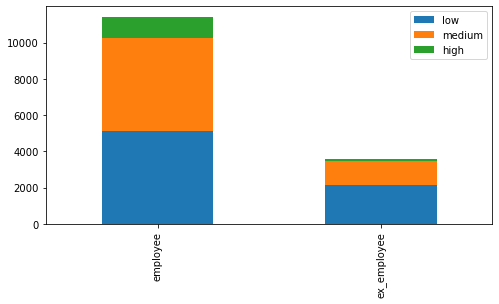

In [109]:
barchart('salary')

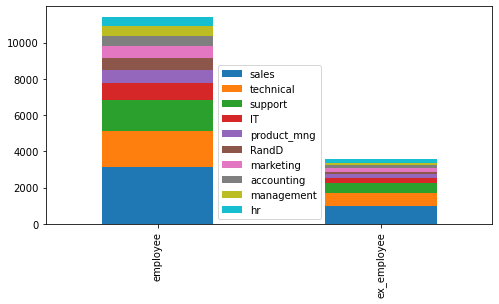

In [110]:
barchart('dept')

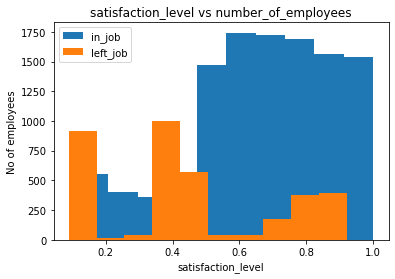

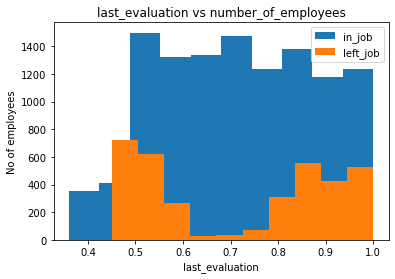

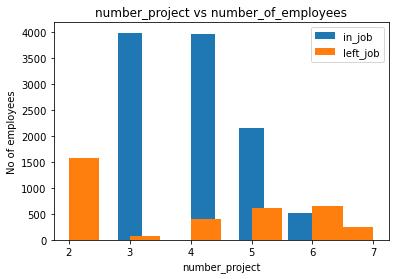

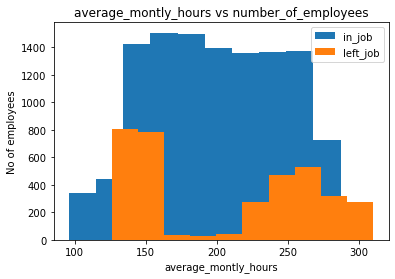

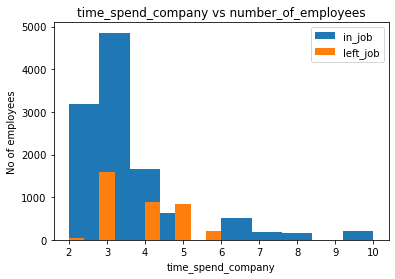

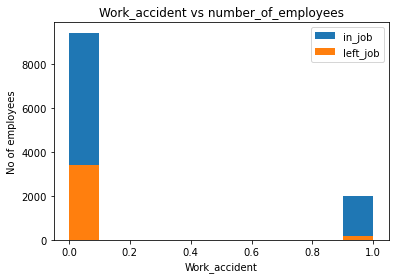

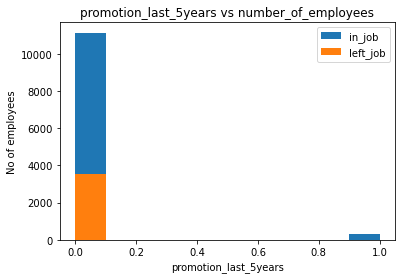

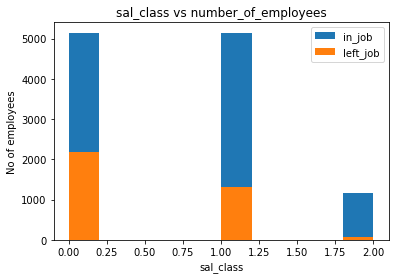

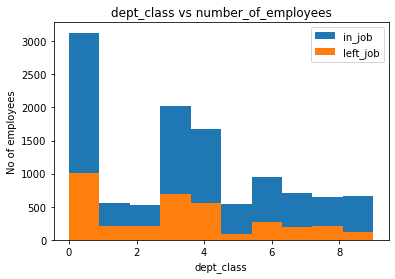

In [132]:
for f in features:
    hg(f)